In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [62]:
Bengaluru_house_price = r"C:\Users\kanna\OneDrive\Desktop\DS HUB\PROJECTS\bengaluru_house_prices.csv"
df = pd.read_csv(Bengaluru_house_price)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [68]:
total_rows = len(df)
print(f'Total rows: {total_rows}')

Total rows: 12790


In [64]:
df['total_sqft'] = df['total_sqft'].apply(pd.to_numeric, errors='coerce')
df['total_sqft']


0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64

In [69]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [70]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

In [67]:
df['bath']

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13314    3.0
13315    4.0
13316    5.0
13317    2.0
13318    4.0
Name: bath, Length: 12790, dtype: float64

In [41]:
mean_bath = df['bath'].mean()
df['bath'].fillna(mean_bath, inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_3924\669035708.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(mean_bath, inplace=True)


In [42]:
mean_balcony = df['balcony'].mean()
df['balcony'].fillna(mean_balcony, inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_3924\865096736.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balcony'].fillna(mean_balcony, inplace=True)


In [66]:
mean_total_sqft = df['total_sqft'].mean()
df['total_sqft'].fillna(mean_total_sqft, inplace=True)
default_society = 'Unknown'
df['society'].fillna(default_society, inplace=True)
default_size = 'Unknown'
df['size'].fillna(default_size, inplace=True)
default_location = 'Unknown'
df['location'].fillna(default_location, inplace=True)
df.drop_duplicates(inplace=True)
print(df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society  total_sqft  bath  balcony   price  
0  Coomee       1056.0   2.0      1.0   39.07  
1  Theanmp      2600.0   5.0      3.0  120.00  
2  Unknown      1440.0   2.0      3.0   62.00  
3  Soiewre      1521.0   3.0      1.0   95.00  
4  Unknown      1200.0   2.0      1.0   51.00  


C:\Users\kanna\AppData\Local\Temp\ipykernel_3924\2165516728.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_sqft'].fillna(mean_total_sqft, inplace=True)
C:\Users\kanna\AppData\Local\Temp\ipykernel_3924\2165516728.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [44]:
total_rows = len(df)
print(f"total rows are : {total_rows}")

total rows are : 12790


In [45]:
df.to_csv('cleaned_data.csv', index=False)
cleaned_df = pd.read_csv('cleaned_data.csv')
print(cleaned_df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society  total_sqft  bath  balcony   price  
0  Coomee       1056.0   2.0      1.0   39.07  
1  Theanmp      2600.0   5.0      3.0  120.00  
2  Unknown      1440.0   2.0      3.0   62.00  
3  Soiewre      1521.0   3.0      1.0   95.00  
4  Unknown      1200.0   2.0      1.0   51.00  


In [46]:
total_rows = len(cleaned_df)
print(f"total rows in the cleaned data is : {total_rows}")

total rows in the cleaned data is : 12790


In [47]:
summary_stats = cleaned_df.describe()
print(summary_stats)

         total_sqft          bath       balcony         price
count  12790.000000  12790.000000  12790.000000  12790.000000
mean    1564.791878      2.708644      1.582529    114.316811
std     1248.141736      1.353853      0.802756    151.486203
min        1.000000      1.000000      0.000000      8.000000
25%     1100.000000      2.000000      1.000000     50.000000
50%     1296.000000      2.000000      2.000000     73.000000
75%     1672.000000      3.000000      2.000000    121.000000
max    52272.000000     40.000000      3.000000   3600.000000


In [48]:
# Price Distribution

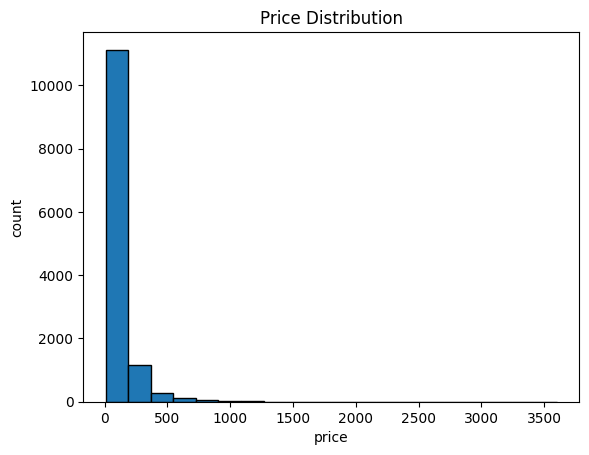

In [49]:
plt.hist(cleaned_df['price'],bins=20,edgecolor='k')
plt.xlabel('price')
plt.ylabel('count')
plt.title('Price Distribution')
plt.show()


In [50]:
# Bar plot for Area_Type

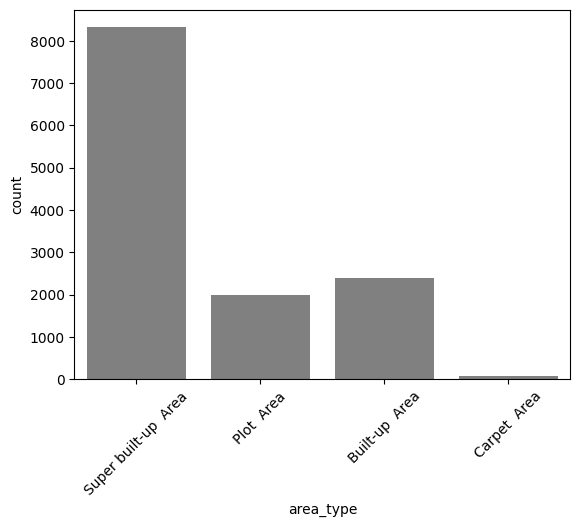

In [51]:
sns.countplot(data=cleaned_df, x='area_type',color='grey')
plt.xticks(rotation=45)
plt.show()

In [52]:
# Data distribution viswalization

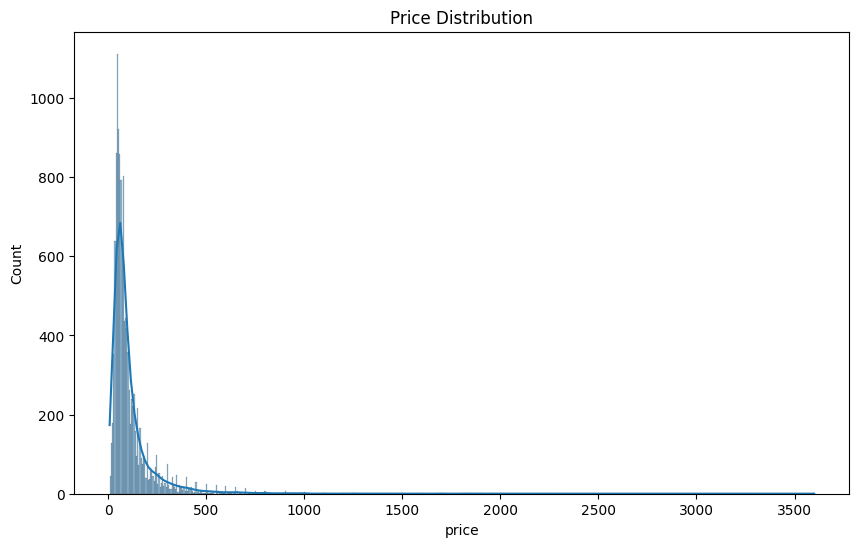

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(cleaned_df['price'], kde=True)
plt.xlabel('price')
plt.title('Price Distribution')
plt.show()

In [54]:
# Scatter plot for Total Square Feet Vs Price:

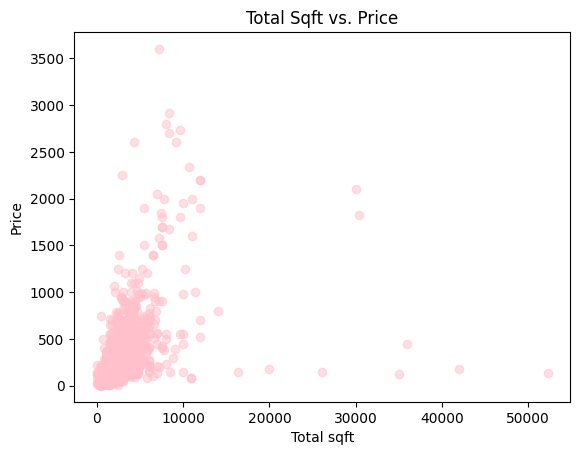

In [55]:
scatter_color = 'pink'
plt.scatter(cleaned_df['total_sqft'], df['price'], alpha=0.5, c=scatter_color)
plt.xlabel('Total sqft')
plt.ylabel('Price')
plt.title('Total Sqft vs. Price')
plt.show()

In [56]:
# Correlation Heatmap

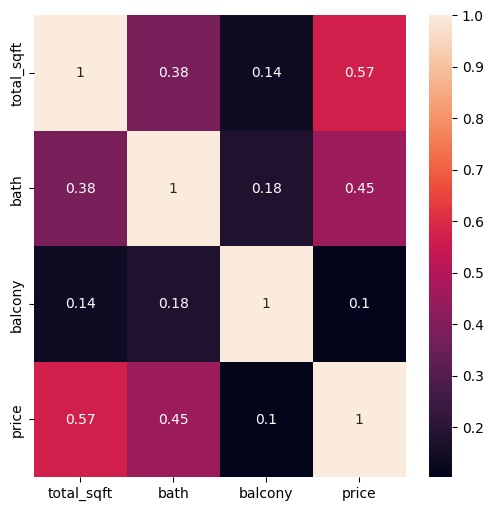

In [57]:
numeric_df = cleaned_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [58]:
# Data Modelling - Regression

In [59]:
x = df[['total_sqft', 'bath','balcony']]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared error: {mse}")

Mean Squared error: 12950.36180997594


In [60]:
# DataModelling -Linear Regression

In [61]:
x = df[['total_sqft', 'bath','balcony']]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f" Linear Regression Mean Squared error: {mse}")

 Linear Regression Mean Squared error: 12124.724793569836
